<a href="https://colab.research.google.com/github/GaneshPechetti/PyTorch/blob/main/02_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,noise=0.05,random_state=39)

In [26]:
print(f"First 5 X features:\n{X[:5]}")
print(f"\nFirst 5 y labels:\n{y[:5]}")


First 5 X features:
[[-0.58347551  0.74376223]
 [-0.72822847  0.4892808 ]
 [ 0.552477   -0.69269432]
 [-0.74820188  0.31411139]
 [-1.03763299 -0.00931792]]

First 5 y labels:
[0 0 1 1 0]


In [27]:
#Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1":X[:,0],"X2":X[:,1],"label":y})
circles.head(10)

,X1,X2,label
0,-0.583476,0.743762,0
1,-0.728228,0.489281,0
2,0.552477,-0.692694,1
3,-0.748202,0.314111,1
4,-1.037633,-0.009318,0
5,-0.718847,0.096274,1
6,0.591242,-0.749337,0
7,0.749783,0.362140,1
8,-0.567321,0.838701,0
9,0.914236,0.021240,0


In [28]:
circles.label.value_counts()

0    500
1    500
Name: label, dtype: int64

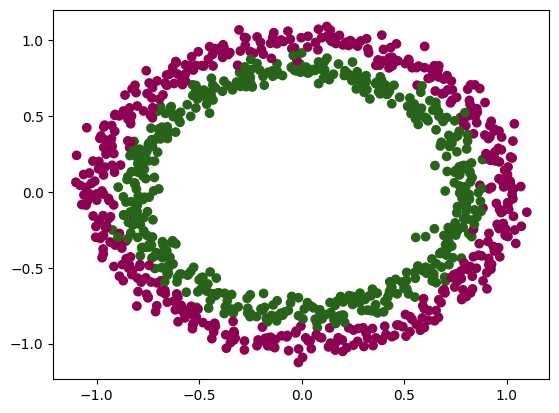

In [29]:
#Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(circles["X1"],circles["X2"],c=y,cmap=plt.cm.PiYG)

In [30]:
X.shape, y.shape

((1000, 2), (1000,))

In [31]:
#Turn data into tensors to remove issues with computations later on
import torch
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

#View the first five samples
X[:5],y[:5]

(tensor([[-0.5835,  0.7438],
         [-0.7282,  0.4893],
         [ 0.5525, -0.6927],
         [-0.7482,  0.3141],
         [-1.0376, -0.0093]]),
 tensor([0., 0., 1., 1., 0.]))

In [32]:
#Split data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=39)
len(X_train),len(X_test),len(y_train),len(y_test)

(800, 200, 800, 200)

In [33]:
#Building a model
import torch
import torch.nn as nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [173]:
# 1 . Construct a model class that subclasses nn.Module
class CircleModel(nn.Module):
    def __init__(self):
        super().__init__()
        # 2 . Create 2 nn.Linear layers capable of handling X and y
        self.sequential_layers = nn.Sequential(
        nn.Linear(in_features=2,out_features=8),
        nn.ReLU(),
        nn.Linear(in_features=8,out_features=4),
        nn.ReLU(),
        nn.Linear(in_features=4,out_features=2),
        nn.ReLU(),
        nn.Linear(in_features=2,out_features=1),
        )

        # 3. Override the forward method containing tLhe forward pass
    def forward(self,x):
        return self.sequential_layers(x)

model = CircleModel().to(device)
model

CircleModel(
  (sequential_layers): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=4, bias=True)
    (3): ReLU()
    (4): Linear(in_features=4, out_features=2, bias=True)
    (5): ReLU()
    (6): Linear(in_features=2, out_features=1, bias=True)
  )
)

In [174]:
model.state_dict()

OrderedDict([('sequential_layers.0.weight',
              tensor([[-0.7020, -0.0697],
                      [-0.3364, -0.2071],
                      [-0.6747,  0.5993],
                      [-0.3610, -0.5163],
                      [-0.5480, -0.1912],
                      [ 0.0449,  0.6726],
                      [ 0.3685, -0.2122],
                      [ 0.2689, -0.5185]], device='cuda:0')),
             ('sequential_layers.0.bias',
              tensor([ 0.6710, -0.2283,  0.6646,  0.3512,  0.3801,  0.0372,  0.3919,  0.2926],
                     device='cuda:0')),
             ('sequential_layers.2.weight',
              tensor([[-0.0610, -0.1655, -0.2145,  0.0779, -0.0652,  0.2835, -0.1820, -0.0743],
                      [ 0.1978, -0.1960,  0.0573,  0.1691,  0.1003, -0.2708, -0.1673, -0.1449],
                      [-0.0680, -0.2336,  0.2322,  0.3398, -0.0885, -0.1074,  0.1904, -0.1518],
                      [-0.1668, -0.1977, -0.2584, -0.3108, -0.1855, -0.0801, -0.1914,  0.32

In [175]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.7020, -0.0697],
         [-0.3364, -0.2071],
         [-0.6747,  0.5993],
         [-0.3610, -0.5163],
         [-0.5480, -0.1912],
         [ 0.0449,  0.6726],
         [ 0.3685, -0.2122],
         [ 0.2689, -0.5185]], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([ 0.6710, -0.2283,  0.6646,  0.3512,  0.3801,  0.0372,  0.3919,  0.2926],
        device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([[-0.0610, -0.1655, -0.2145,  0.0779, -0.0652,  0.2835, -0.1820, -0.0743],
         [ 0.1978, -0.1960,  0.0573,  0.1691,  0.1003, -0.2708, -0.1673, -0.1449],
         [-0.0680, -0.2336,  0.2322,  0.3398, -0.0885, -0.1074,  0.1904, -0.1518],
         [-0.1668, -0.1977, -0.2584, -0.3108, -0.1855, -0.0801, -0.1914,  0.3299]],
        device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([ 0.1288,  0.1879, -0.3360,  0.2756], device='cuda:0',
        requires_grad=True),
 Parameter containing:
 tensor([[ 0.13

In [194]:
#create a loss function

loss_fn = nn.BCEWithLogitsLoss()

#create an optimzier
optimizer = torch.optim.SGD(params=model.parameters(),lr=0.001)

In [177]:
def accuracy_score(y_true,y_pred):
    correct = torch.eq(y_true,y_pred).sum().item()
    acc = (correct/len(y_pred))*100
    return acc

In [178]:
with torch.inference_mode():
    y_logits = model(X_test.to(device))[:5]
y_logits

tensor([[0.2531],
        [0.1212],
        [0.1768],
        [0.2539],
        [0.1570]], device='cuda:0')

In [195]:
#Building a training loop
torch.manual_seed(39)
model.to(device)

epochs = 500

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):

    model.train()
    #1. Forward pass
    y_logits = model(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    #2. Calculate the loss
    loss = loss_fn(y_logits,y_train)
    acc = accuracy_score(y_train,y_pred)

    #3. Optimizer Zero grad
    optimizer.zero_grad()

    #4 . Loss backward
    loss.backward()

    #5. Optimizer step
    optimizer.step()

    model.eval()
    with torch.inference_mode():
        #1.Forward pass
        test_logits = model(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # 2 . Calculate loss
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_score(y_test,test_pred)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}%, test_loss: {test_loss:.5f}, Test_accuracy: {test_acc:.2}%")

Epoch: 0 | Loss: 0.06767, Accuracy: 97.25%, test_loss: 0.08235, Test_accuracy: 9.6e+01%
Epoch: 10 | Loss: 0.06767, Accuracy: 97.25%, test_loss: 0.08236, Test_accuracy: 9.6e+01%
Epoch: 20 | Loss: 0.06767, Accuracy: 97.25%, test_loss: 0.08236, Test_accuracy: 9.6e+01%
Epoch: 30 | Loss: 0.06767, Accuracy: 97.25%, test_loss: 0.08239, Test_accuracy: 9.6e+01%
Epoch: 40 | Loss: 0.06767, Accuracy: 97.25%, test_loss: 0.08239, Test_accuracy: 9.6e+01%
Epoch: 50 | Loss: 0.06767, Accuracy: 97.25%, test_loss: 0.08239, Test_accuracy: 9.6e+01%
Epoch: 60 | Loss: 0.06767, Accuracy: 97.25%, test_loss: 0.08238, Test_accuracy: 9.6e+01%
Epoch: 70 | Loss: 0.06767, Accuracy: 97.25%, test_loss: 0.08238, Test_accuracy: 9.6e+01%
Epoch: 80 | Loss: 0.06767, Accuracy: 97.25%, test_loss: 0.08238, Test_accuracy: 9.6e+01%
Epoch: 90 | Loss: 0.06767, Accuracy: 97.25%, test_loss: 0.08239, Test_accuracy: 9.6e+01%
Epoch: 100 | Loss: 0.06767, Accuracy: 97.25%, test_loss: 0.08238, Test_accuracy: 9.6e+01%
Epoch: 110 | Loss: 0.

In [180]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
    print("helper_functions.py already exsists")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py","wb") as f :
        f.write(request.content)
from helper_functions import plot_predictions, plot_decision_boundary


helper_functions.py already exsists


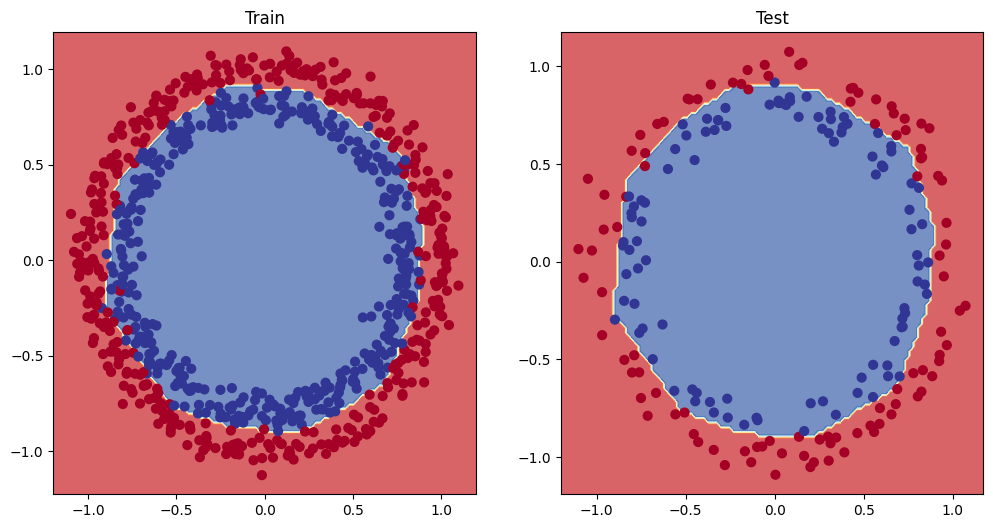

In [213]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")

plot_decision_boundary(model,X_train,y_train)

plt.subplot(1,2,2)
plt.title("Test")

plot_decision_boundary(model,X_test,y_test)

In [204]:
#Making predictions with our model
model.eval()
with torch.inference_mode():
    y_preds = model(X_test)
y_preds

tensor([[ -7.4212],
        [-19.0204],
        [ 10.4612],
        [-12.4281],
        [ 14.1547],
        [ -7.4883],
        [ -1.3068],
        [ 12.3502],
        [ 14.1547],
        [ -9.3692],
        [  8.7509],
        [  3.5590],
        [  7.0398],
        [ -5.9843],
        [ -6.8137],
        [  6.6912],
        [-18.1865],
        [ -6.3948],
        [ -0.1745],
        [  8.2989],
        [  2.9733],
        [ 11.5159],
        [ -7.3502],
        [  7.3336],
        [ -1.1924],
        [ 11.8527],
        [ -9.2747],
        [ 12.5266],
        [-14.9930],
        [-11.8182],
        [  8.7813],
        [ -8.9179],
        [  8.7024],
        [ -9.4023],
        [ 11.5938],
        [ -0.9272],
        [  4.4118],
        [  7.3863],
        [ 14.1547],
        [  3.2071],
        [ -9.7558],
        [ 10.4438],
        [ 10.3742],
        [ -8.3420],
        [-20.0872],
        [-12.7846],
        [ -7.5475],
        [ -8.7875],
        [-10.0734],
        [-10.9450],


In [207]:
from pathlib import Path

# 1. create models directroy
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#2. Create model save path
MODEL_NAME = "02_pytorch.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

#3. Save the model state dict
print(f"Saving model to : {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(),f=MODEL_SAVE_PATH)

Saving model to : models/02_pytorch.pth


In [208]:
loaded_model = CircleModel().to(device)

In [209]:
next(loaded_model.parameters()).device

device(type='cuda', index=0)

In [210]:
loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

In [212]:
#Evaluating loaded model
loaded_model.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model(X_test)
y_preds==loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        